In [69]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from tqdm import tqdm
#for kfold
from sklearn.model_selection import KFold
#for accuarcy
from sklearn.metrics import r2_score

Implemeting Linear Regression for multiple features:
1) Defining the model
* y_hat = w(i) * x(i) + b
2) Defining cost function
3) Defining the Gradient Decent Computation
4) Defining the Gradient Decent
w = w - alpha * dj_dw
b = b- alpha * dj_dw
5) Defning Predict function
6) ploting cost function

In [263]:
df = pd.read_csv('cleanHousing.csv')
# Rescaling area features using Min-Max scaling
min_value = df['area'].min()
max_value = df['area'].max()

# Rescale to a range of [0, 1]
df['area'] = (df['area'] - min_value) / (max_value - min_value)
X = np.array(df.drop(columns=['price'])) # Features (all columns except the target)
y = np.array(df['price']) # Target variable
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

b_init = 0
w_init = np.array([0, 0, 0,0,0,0,0,0])

In [258]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7
0,0.298969,3.0,2.0,4.0,1.0,1.0,1.0,0.0
1,0.381443,3.0,2.0,1.0,1.0,1.0,3.0,0.0
2,0.148866,2.0,1.0,1.0,1.0,1.0,2.0,0.0
3,0.065979,3.0,1.0,2.0,1.0,0.0,0.0,1.0
4,0.144330,3.0,1.0,2.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
431,0.298969,4.0,2.0,4.0,1.0,1.0,0.0,0.0
432,0.261168,4.0,2.0,1.0,1.0,1.0,0.0,1.0
433,0.195876,3.0,2.0,3.0,1.0,0.0,1.0,0.0
434,0.164261,2.0,1.0,1.0,1.0,0.0,0.0,0.0


In [72]:


class my_LinearRegression:
    def __init__(self,w, b, alpha=4.05e-4, iters=1000, folds=10):
        self.alpha = alpha
        self.iters = iters
        self.folds = folds
        self.w = w
        self.b = b
        

    def compute_cost(self, X, y):
        m = len(y)
        y_predicted = np.dot(X, self.w) + self.b
        squared_errors = (y_predicted - y) ** 2
        cost = np.sum(squared_errors) / (1 / (2 * m))
        return cost


    def fit(self, X, y):
        costs = []
        kf = KFold(n_splits=self.folds, shuffle=True)

        for train_index, _ in kf.split(X):
            X_train, y_train = X[train_index], y[train_index]
            n_samples, n_features = X_train.shape
            self.w = np.zeros(n_features)
            self.b = 0
            iteration_costs = []  # Store costs for each iteration

            for _ in tqdm(range(self.iters)):
                y_predicted = np.dot(X_train, self.w) + self.b
                dw = (1 / n_samples) * np.dot(X_train.T, (y_predicted - y_train))
                db = (1 / n_samples) * np.sum(y_predicted - y_train)
                self.w -= self.alpha * dw
                self.b -= self.alpha * db

                # Compute cost for the current iteration and store it
                cost = self.compute_cost(X_train, y_train)
                iteration_costs.append(cost)

            costs.append(iteration_costs)  # Store costs for each fold

            # Plotting cost for each iteration within the fold
            plt.plot(range(1, self.iters + 1), iteration_costs, label=f'Fold {len(costs)}')

        # Plot settings and display
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.title('Cost per Iteration for Each Fold')
        plt.legend()
        plt.show()

        return self.w, self.b, costs


100%|██████████| 10000/10000 [00:00<00:00, 39932.06it/s]


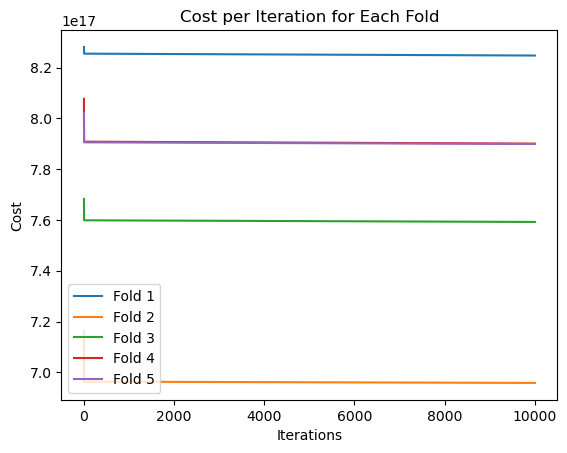

b,w found by gradient descent: 115.98145041474649, [852.08633993 431.26439023 235.23243621 356.37340726  99.44174607
  91.49849196  98.58905869  44.67333996]
R-squared: 0.9999999999999675
     Target Value  Predicted Value
0         4060000          5030432
1         6650000          5541746
2         3710000          3444098
3         6440000          4262980
4         2800000          3376363
..            ...              ...
104       9100000          5115604
105       3773000          5907846
106       7910000          5116545
107       7350000          5115401
108       5530000          5200305

[109 rows x 2 columns]


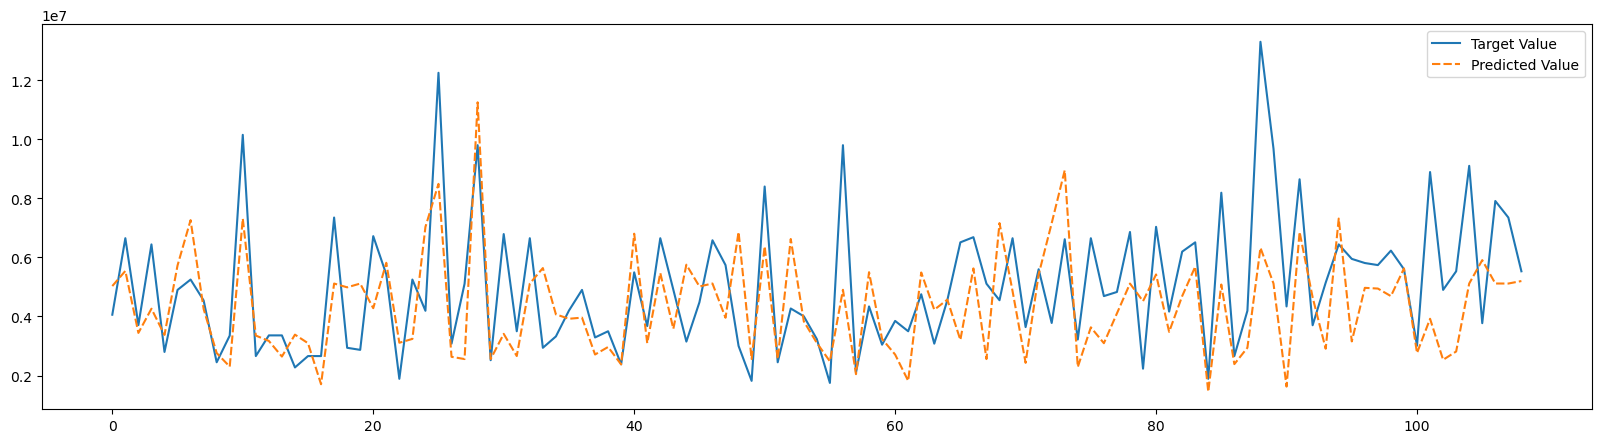

In [266]:
initial_w = np.zeros_like(X_train.shape[1])
initial_b = 0
#gradient descent settings
iterations = 1000
#No rescale alpha = 3.04e-8
alpha = 0.01
folds = 5
# Create an instance of my_LinearRegression class

model = my_LinearRegression(alpha=alpha, iters=iterations, folds=folds, w=initial_w, b=initial_b)


# Perform gradient descent
w, b, costs = model.fit(X_train, y_train)
print(f"b,w found by gradient descent: {b}, {w}")

#define the predict function
def predict(X, w, b):
    return np.dot(X, w) + b
y_hat = predict(X_test, w, b)

# Calculate R-squared
r_squared = r2_score(np.round(y_hat), y_hat)
print(f"R-squared: {r_squared}")



#Create a Data frame of predicted and target values
y_hat_df = pd.DataFrame(np.round(y_hat).astype(int), y_test).reset_index()
new_column_names = {'index': 'Target Value', 0: 'Predicted Value'}
y_hat_df = y_hat_df.rename(columns=new_column_names)
print(y_hat_df)



#ploting data
plt.figure(figsize=(20,5))
sns.lineplot(data = y_hat_df)
plt.show()